# ZOEE - User guide

### Short tutorial for using the ZOEE-Standalone  v0.1

-----

- Installation of ZOEE
- Usage
    - Import
    - Configuration
    - Simulation
- Further applications


For more information about using ZOEE please visit the documentation https://lowebms.readthedocs.io/en/latest/. There described is the full ZOEE package which includes further implemetation than the standalone version but may contain errors as it is in a experimental stage.

# Installation of ZOEE
---

The ZOEE-Standalone v0.1 can be easily installed from the Terminal:

Navigate to the directory where ZOEE was extraxted and run the setup.py script which installs ZOEE and all its dependencies:

> **cd ~/ZOEE_Standalone_v01** <br />

> **python setup.py install**

----

If the dependencies are already met, ZOEE can also be used without installing by working from the directory where ZOEE was extracted (this allows to modify ZOEEs implementations and use it without installing it to your python environment).

# Usage
-------
Budykos and Sellers original energy balance model are chosen to give a showcase of how ZOEE can be configured and used to simulate over a given time period.



## Step 1: Import the modules
----

Load the most important ZOEE modules into the working environment (**Configuration.importer, Variables.variable_importer** and **RK4.rk4alg**)

And for calculations **numpy** and plotting **matplotlib**

In [1]:
from ZOEE.modules.configuration import importer
from ZOEE.modules.variables import variable_importer
from ZOEE.modules.rk4 import rk4alg

import matplotlib.pyplot as plt
import numpy as np

## Step 2: Configure the model in an external Configuration.ini file
---

The model and simulation details are provided by an external configuration file.
Each configuration file has to includes sections for the simulation setup (**[rk4input]**, **[initials]**) and sections for the model setup (**[eqparam]** and several **[func_]**).<br />
Descriptions of the parameters are included in the file.

**This configuration file contains all the information for the EBM! The simulation setup, the formulation of the model and the values of all its parameters**

## Step 3: Simulation with ZOEE and display output
---
The model is described in the configuration itself which has to be imported first. First of all, this configuration is used to temporally load the required variables into your python environment, and can then be used to start a simulation.

In [2]:
#Import the Configuration data, with importer(Path_to_configuration_file)
EBM0D_config=importer('ZOEE/tutorials/config/EBM0D_simple_config.ini')

#Load the models configuration variables into your python environment so ZOEE, with variable_importer(Config)
variable_importer(EBM0D_config)

#Run the algorithm based on the models configuration, with rk4alg(Config).
#Return the array [Time,Zonal mean Temp, Global mean Temp]
Time,ZMT,GMT=rk4alg(EBM0D_config)

Loading Configuration from: ZOEE/tutorials/config/EBM0D_simple_config.ini
0D


In [8]:
EBM0D_config['eqparam']

{'c_ao': 294000000.0}

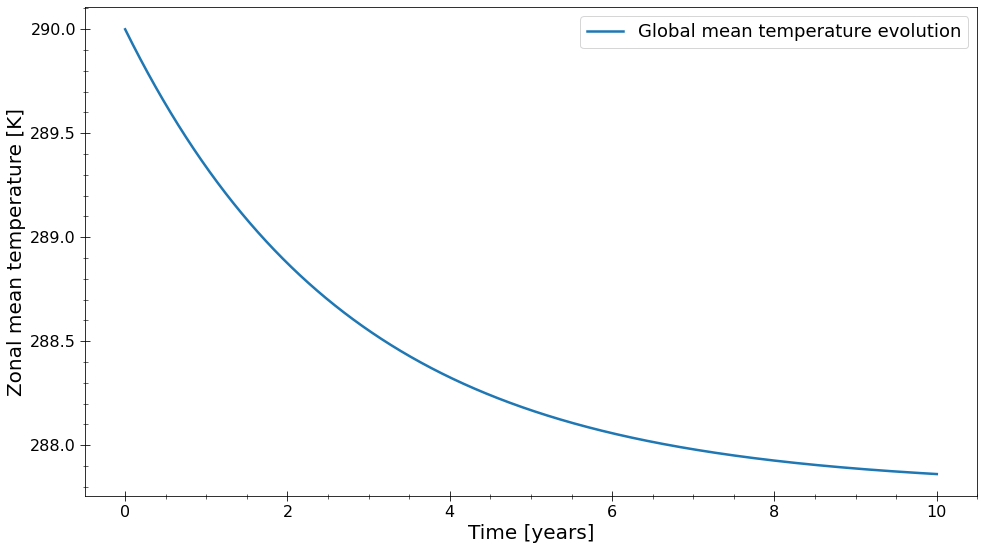

In [9]:
from ZOEE import update_plotstyle
import ZOEE.modules.constants as const
update_plotstyle() #Script to update some plottingparameters

plt.plot(Time/const.time_sec_year,GMT, label='Global mean temperature evolution')
plt.legend(fontsize=18)
plt.xlabel('Time [years]')
plt.ylabel('Zonal mean temperature [K]')
plt.show()

### Further applications
---
ZOEE can be used to perform simulations with EBMs in various ways.
- Modify the parameterizations
- Extend with radiative forcings
- Perform ensemble runs in a parallelized simulation
- Run a optimization of parameters to adapt EBM to climate data

In [6]:
from lowEBMs.Packages.Optimization import add_parameters

parameter_labels=[['func1','m']]
parameter_values=[[0.48,0.49,0.5,0.51,0.52]]
parameter_levels=[None]
setup={'number_of_parameters': 5, 'number_of_cycles': 1, 'number_of_parallels': 5}

variable_importer(Sel_OG_config,control=True,parallel=True,parallel_config=setup)
Sel_OG_config_parallel,P=add_sellersparameters(Sel_OG_config,parameterinterpolatorstepwise,
                                      'Data/SellersParameterization.ini',2,0,True,True)
Sel_OG_config_parallel=add_parameters(Sel_OG_config_parallel,parameter_values,parameter_labels,parameter_levels)

#Run the algorithm based on the models configuration, with rk4alg(Config).
#Return the array [Time,Zonal mean Temp, Global mean Temp]
Time_Sel_p,ZMT_Sel_p,GMT_Sel_p=rk4alg(Sel_OG_config)

Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.
Loading Parameters from: Data/SellersParameterization.ini


Eq. State reached after 87086 steps, within 393.115510225296 seconds



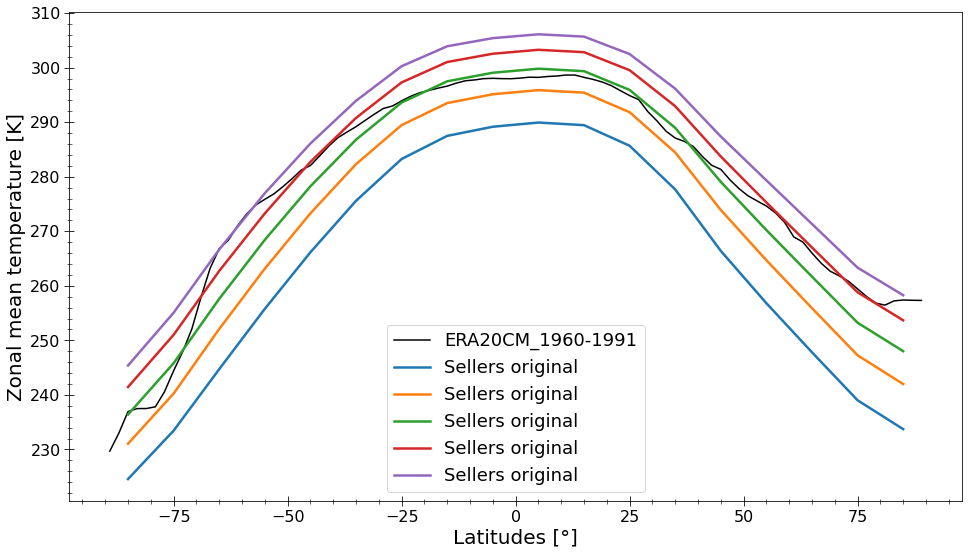

In [7]:
plt.plot(Lat_2,ZMT_2,c='k',linewidth=1.5,label='ERA20CM_1960-1991')
for i in range(ZMT_Sel_p.shape[1]):
    plt.plot(Lat_10,ZMT_Sel_p[-1,i],label='Sellers original')
plt.legend(fontsize=18)
plt.xlabel('Latitudes [°]')
plt.ylabel('Zonal mean temperature [K]')
plt.show()